In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd
import tensorflow as tf
import tensorflow.keras as k
import seaborn as sns
from zipfile import ZipFile
import numpy as np
from PIL import Image
from io import BytesIO
import cv2 as cv

In [2]:
path="D:\\Work_folders\\datasets\\Advanced Computer Vision Project"

In [3]:
file_name="Part 1 - Train data - images.npy"

In [4]:
data=np.load(path+"\\"+file_name,allow_pickle=True)

In [5]:
for each in data:
    element=each[1]
    for each_item in element:
        k=each_item["label"][0]
        if k!="Face":
            print("Other Objects detected")
    

[{'label': ['Face'], 'notes': '', 'points': [{'x': 0.08615384615384615, 'y': 0.3063063063063063}, {'x': 0.1723076923076923, 'y': 0.45345345345345345}], 'imageWidth': 650, 'imageHeight': 333}, {'label': ['Face'], 'notes': '', 'points': [{'x': 0.583076923076923, 'y': 0.2912912912912913}, {'x': 0.6584615384615384, 'y': 0.46846846846846846}], 'imageWidth': 650, 'imageHeight': 333}]


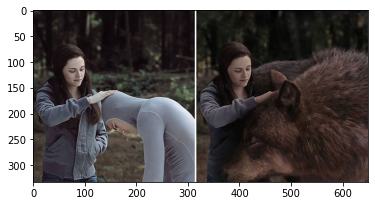

In [6]:
plt.imshow(data[0][0])
print(data[0][1])

In [7]:
data_img=[]
data_label=[]
for each in data:
    data_img.append(each[0])
    data_label.append(each[1])

[{'label': ['Face'], 'notes': '', 'points': [{'x': 0.7053087757313109, 'y': 0.23260437375745527}, {'x': 0.7692307692307693, 'y': 0.36182902584493043}], 'imageWidth': 1280, 'imageHeight': 697}]


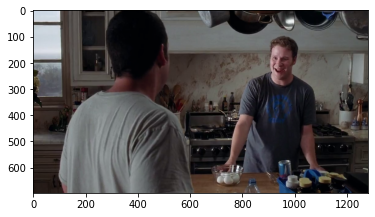

In [8]:
plt.imshow(data_img[1])
print(data_label[1])

In [9]:
print("The Total number of images in the data is : ",len(data_img))

The Total number of images in the data is :  409


In [10]:
def show_image_bounding(image_data,label_data):
    import matplotlib.pyplot as plt
    data_img=image_data
    data_label=label_data
    image_height = data_label[0]["imageHeight"]
    image_width=data_label[0]["imageWidth"]
    no_faces=len(data_label)
    fig,ax = plt.subplots()
    print(type(ax))
    for each in range(no_faces):
        region=data_label[each]["points"]
        x0 = int(region[0]["x"] * image_width) # Scale the BBox
        y0 = int(region[0]["y"] * image_height)
        #print(x0,y0)

        x1 = int((region[1]["x"]) * image_width)
        y1 = int((region[1]["y"]) * image_height)
       # print(x1,y1)

        # Create a Rectangle patch
        rect = patches.Rectangle((x0, y0), x1 - x0, y1 - y0, linewidth=2, edgecolor='r', facecolor='none')
        
        ax.imshow(data_img)

        # Add the patch to the Axes
        ax.add_patch(rect)

    plt.show()

<class 'matplotlib.axes._subplots.AxesSubplot'>


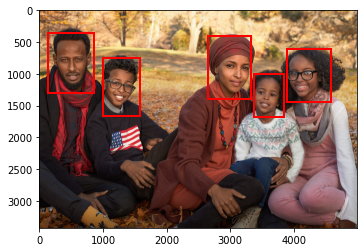

In [11]:
show_image_bounding(data_img[12],data_label[12])

Image Index :  10
<class 'matplotlib.axes._subplots.AxesSubplot'>


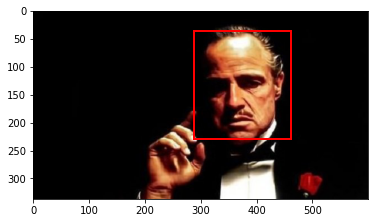

Image Index :  14
<class 'matplotlib.axes._subplots.AxesSubplot'>


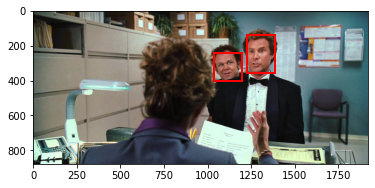

Image Index :  18
<class 'matplotlib.axes._subplots.AxesSubplot'>


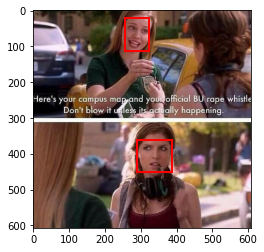

Image Index :  22
<class 'matplotlib.axes._subplots.AxesSubplot'>


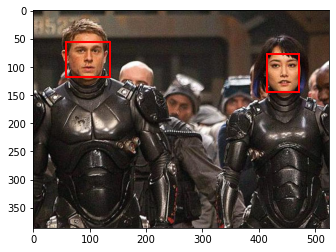

Image Index :  26
<class 'matplotlib.axes._subplots.AxesSubplot'>


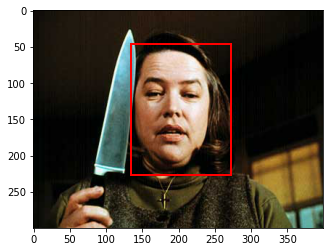

Image Index :  30
<class 'matplotlib.axes._subplots.AxesSubplot'>


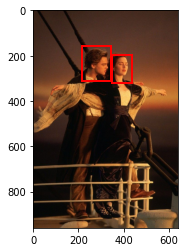

Image Index :  34
<class 'matplotlib.axes._subplots.AxesSubplot'>


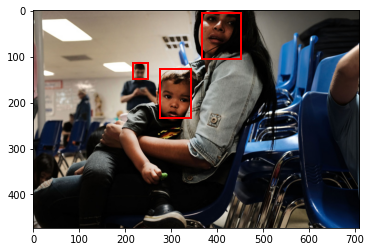

Image Index :  38
<class 'matplotlib.axes._subplots.AxesSubplot'>


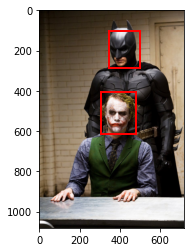

Image Index :  42
<class 'matplotlib.axes._subplots.AxesSubplot'>


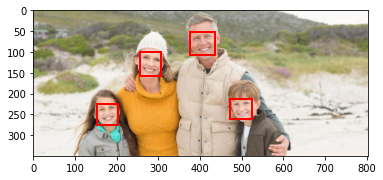

Image Index :  46
<class 'matplotlib.axes._subplots.AxesSubplot'>


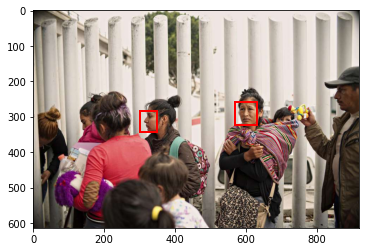

Image Index :  50
<class 'matplotlib.axes._subplots.AxesSubplot'>


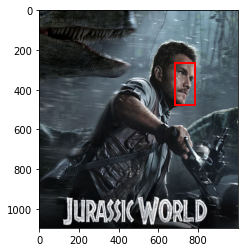

Image Index :  54
<class 'matplotlib.axes._subplots.AxesSubplot'>


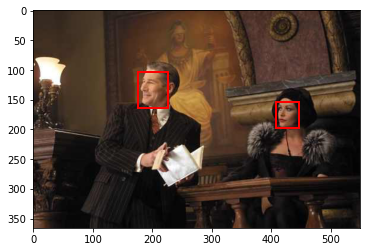

Image Index :  58
<class 'matplotlib.axes._subplots.AxesSubplot'>


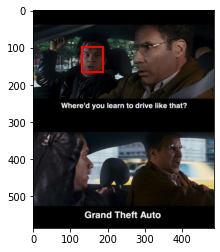

Image Index :  62
<class 'matplotlib.axes._subplots.AxesSubplot'>


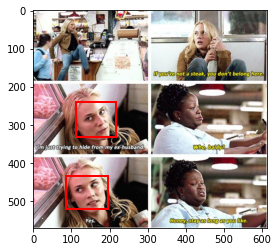

Image Index :  66
<class 'matplotlib.axes._subplots.AxesSubplot'>


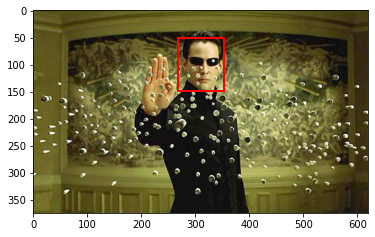

Image Index :  70
<class 'matplotlib.axes._subplots.AxesSubplot'>


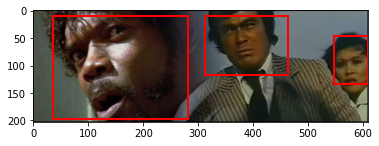

Image Index :  74
<class 'matplotlib.axes._subplots.AxesSubplot'>


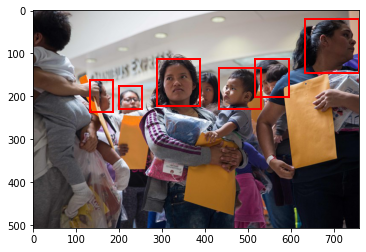

Image Index :  78
<class 'matplotlib.axes._subplots.AxesSubplot'>


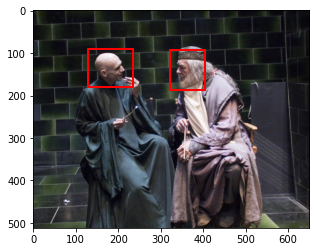

Image Index :  82
<class 'matplotlib.axes._subplots.AxesSubplot'>


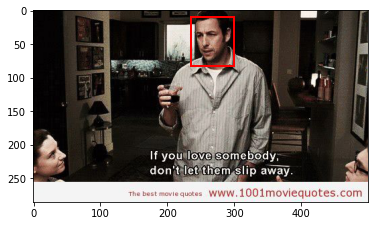

Image Index :  86
<class 'matplotlib.axes._subplots.AxesSubplot'>


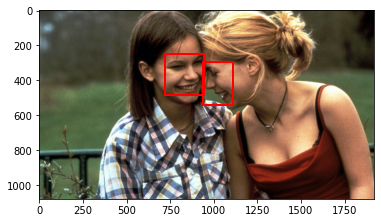

Image Index :  90
<class 'matplotlib.axes._subplots.AxesSubplot'>


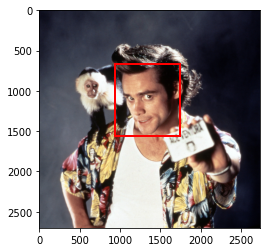

Image Index :  94
<class 'matplotlib.axes._subplots.AxesSubplot'>


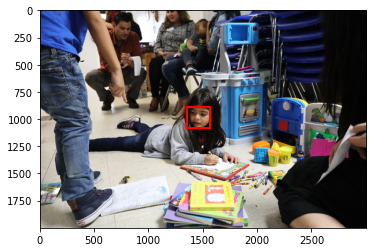

Image Index :  98
<class 'matplotlib.axes._subplots.AxesSubplot'>


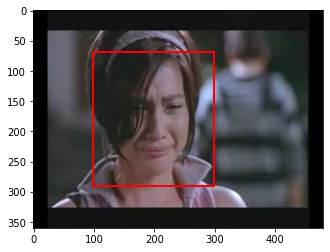

Image Index :  102
<class 'matplotlib.axes._subplots.AxesSubplot'>


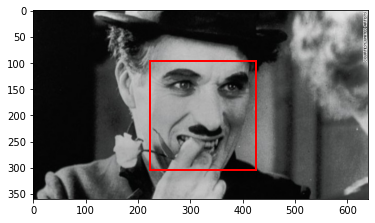

Image Index :  106
<class 'matplotlib.axes._subplots.AxesSubplot'>


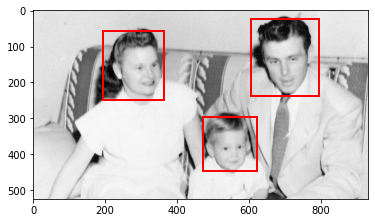

Image Index :  110
<class 'matplotlib.axes._subplots.AxesSubplot'>


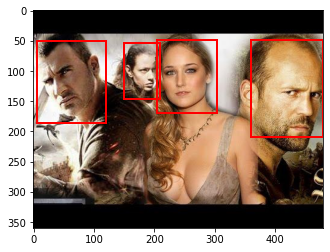

Image Index :  114
<class 'matplotlib.axes._subplots.AxesSubplot'>


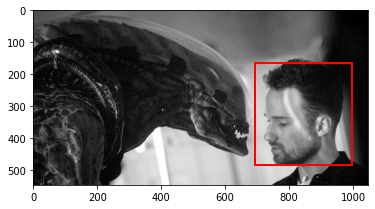

Image Index :  118
<class 'matplotlib.axes._subplots.AxesSubplot'>


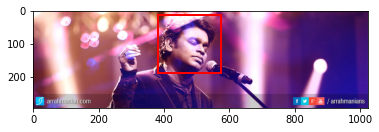

Image Index :  122
<class 'matplotlib.axes._subplots.AxesSubplot'>


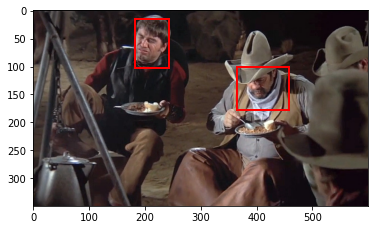

Image Index :  126
<class 'matplotlib.axes._subplots.AxesSubplot'>


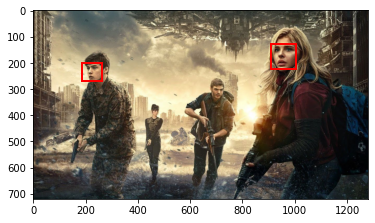

Image Index :  130
<class 'matplotlib.axes._subplots.AxesSubplot'>


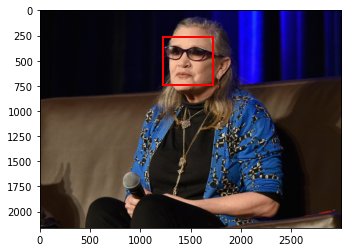

Image Index :  134
<class 'matplotlib.axes._subplots.AxesSubplot'>


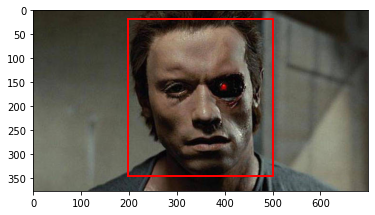

Image Index :  138
<class 'matplotlib.axes._subplots.AxesSubplot'>


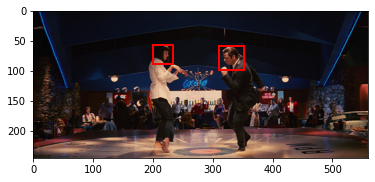

Image Index :  142
<class 'matplotlib.axes._subplots.AxesSubplot'>


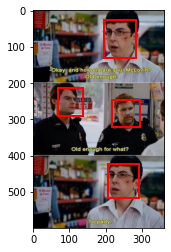

Image Index :  146
<class 'matplotlib.axes._subplots.AxesSubplot'>


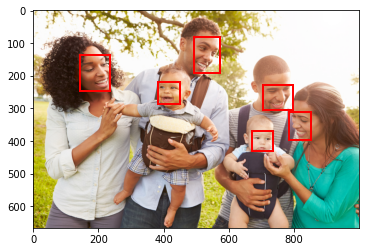

In [12]:
for i in range(10,150,4):
    print("Image Index : ",i)
    show_image_bounding(data_img[i],data_label[i])

In [13]:
#Removing alpha channel from the images via Computer Vision Libraries
for i in range(len(data_img)):
    #print(data_img[i].shape)
    try:
        assert data_img[i].shape[2]!=3
        print("Before",i)
        print(data_img[i])
        print("After")
        data_img[i] = cv.cvtColor(data_img[i], cv.COLOR_BGRA2BGR)
        print(data_img[i])
    except:
        pass
        

Before 1
[[[207 216 227 255]
  [206 216 227 255]
  [207 216 227 255]
  ...
  [ 35  33  34 255]
  [ 35  33  34 255]
  [ 35  33  34 255]]

 [[207 216 227 255]
  [207 216 227 255]
  [207 216 227 255]
  ...
  [ 35  32  33 255]
  [ 35  33  34 255]
  [ 35  33  34 255]]

 [[207 216 227 255]
  [207 216 227 255]
  [207 215 227 255]
  ...
  [ 35  33  33 255]
  [ 35  33  34 255]
  [ 35  33  34 255]]

 ...

 [[ 31  21  17 255]
  [ 31  22  18 255]
  [ 31  22  18 255]
  ...
  [  0   1   4 255]
  [  0   1   4 255]
  [  0   1   4 255]]

 [[ 31  22  18 255]
  [ 31  22  18 255]
  [ 31  22  18 255]
  ...
  [  0   1   4 255]
  [  0   1   4 255]
  [  0   1   4 255]]

 [[ 31  22  18 255]
  [ 30  22  17 255]
  [ 31  22  18 255]
  ...
  [  0   1   4 255]
  [  0   1   4 255]
  [  0   1   4 255]]]
After
[[[207 216 227]
  [206 216 227]
  [207 216 227]
  ...
  [ 35  33  34]
  [ 35  33  34]
  [ 35  33  34]]

 [[207 216 227]
  [207 216 227]
  [207 216 227]
  ...
  [ 35  32  33]
  [ 35  33  34]
  [ 35  33  34]]

 [[

In [14]:
def IoU(y_true, y_pred):
    iou = tf.py_function(IOU, [y_true, y_pred], Tout=tensorflow.float32)
    return iou

In [15]:
img_data=[]
for i in range(len(data_img)):
    img_data.append(cv.resize(data_img[i], (224, 224), interpolation = cv.INTER_NEAREST))
test_img=img_data[0]
test_info=data_label[0]

In [16]:
len(img_data)

409

In [17]:
test_img.shape

(224, 224, 3)

In [18]:
train_img=img_data[1]
train_info=data_label[1]

In [46]:
train_info

[{'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.7053087757313109, 'y': 0.23260437375745527},
   {'x': 0.7692307692307693, 'y': 0.36182902584493043}],
  'imageWidth': 1280,
  'imageHeight': 697}]

In [19]:
def extract_info(data_label_input):
    output=[]
    data_label=data_label_input
    for each in data_label:
        points=each[0]["points"]
        output.append([points[0]["x"]*224,points[0]["y"]*224,points[1]["x"]*224,points[1]["y"]*224])
    return output
    
    

In [60]:
data_label[0][0]

{'label': ['Face'],
 'notes': '',
 'points': [{'x': 0.08615384615384615, 'y': 0.3063063063063063},
  {'x': 0.1723076923076923, 'y': 0.45345345345345345}],
 'imageWidth': 650,
 'imageHeight': 333}

In [52]:
np.array(extract_info(data_label)).shape

(409, 4)

In [20]:
y=np.array(extract_info(data_label))

In [21]:
y[1]

array([157.98916576,  52.10337972, 172.30769231,  81.04970179])

In [27]:
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, Reshape
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.layers import concatenate,Dense
import cv2
IMAGE_SIZE=224
ALPHA = 1.0 # Width hyper parameter for MobileNet (0.25, 0.5, 0.75, 1.0). Higher width means more accurate but slower

In [15]:

IMAGE_HEIGHT=224
IMAGE_WIDTH=224
masks = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH))
X = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH, 3))
for index in range(data.shape[0]):
    img = data[index][0]
    img = cv2.resize(img, dsize=(IMAGE_HEIGHT, IMAGE_WIDTH), interpolation=cv2.INTER_CUBIC)
    try:
        img = img[:, :, :3]
    except:
        continue
    X[index] = preprocess_input(np.array(img, dtype=np.float32))
    for i in data[index][1]:
        x1 = int(i["points"][0]['x'] * IMAGE_WIDTH)
        x2 = int(i["points"][1]['x'] * IMAGE_WIDTH)
        y1 = int(i["points"][0]['y'] * IMAGE_HEIGHT)
        y2 = int(i["points"][1]['y'] * IMAGE_HEIGHT)
        masks[index][y1:y2, x1:x2] = 1

In [31]:
def create_model(trainable=True):
    model = MobileNet(input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3), include_top=False, alpha=ALPHA, weights="imagenet")

    block0 = model.get_layer("conv_pw_1_relu").output 
    block = model.get_layer("conv_pw_1_relu").output
    block1 = model.get_layer("conv_pw_3_relu").output
    block2 = model.get_layer("conv_pw_5_relu").output
    block3 = model.get_layer("conv_pw_11_relu").output
    block4 = model.get_layer("conv_pw_13_relu").output

    x = concatenate()([UpSampling2D()(block4), block3])
    x = concatenate()([UpSampling2D()(x), block2])
    x = concatenate()([UpSampling2D()(x), block1])
    x = concatenate()([UpSampling2D()(x), block])
 #   x = Concatenate()([UpSampling2D()(x), block0])
    x = UpSampling2D()(x)
    x = Conv2D(1, kernel_size=1, activation="sigmoid")(x)

    x = Reshape((IMAGE_HEIGHT, IMAGE_HEIGHT))(x)

    return Model(inputs=model.input, outputs=x)

model = create_model()

TypeError: concatenate() missing 1 required positional argument: 'inputs'

In [59]:
def create_model(trainable=True):
    model = MobileNet(input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3), include_top=False, alpha=ALPHA) # Load pre-trained mobilenet
    # Do not include classification (top) layer

    # to freeze layers, except the new top layer, of course, which will be added below
    for layer in model.layers:
        layer.trainable = trainable

    # Add new top layer which is a conv layer of the same size as the previous layer so that only 4 coords of BBox can be output
    x0 = model.layers[-1].output
    x1 = Conv2D(4, kernel_size=6, name="coords")(x0)
    # In the line above kernel size should be 3 for img size 96, 4 for img size 128, 5 for img size 160 etc.
    x2 = Dense(1,activation="softmax")(x1) # These are the 4 predicted coordinates of one BBox
    x3= Reshape((4,))(x2)
    return Model(inputs=model.input, outputs=x3)

model=create_model()

model.summary()

Model: "model_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_21 (InputLayer)        [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0  

In [60]:
print(X.shape)
print(y.shape)

(409, 224, 224, 3)
(409, 4)


In [71]:
np.reshape(X[1],newshape=(-1,)).shape

(150528,)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


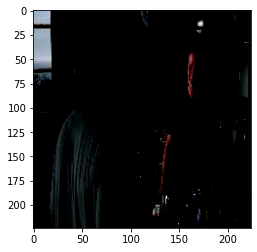

In [74]:
plt.imshow(X[1])

In [61]:
y[1]

array([157.98916576,  52.10337972, 172.30769231,  81.04970179])

In [65]:
model.compile(optimizer="Adam",loss="mse")
model.fit(X,y,epochs=30,validation_split=0.2,use_multiprocessing=True)

Epoch 1/30
11/11 [==============================] - 6s 364ms/step - loss: 9097.2831 - val_loss: 8827.7783
Epoch 2/30
11/11 [==============================] - 4s 331ms/step - loss: 9080.8302 - val_loss: 8827.7783
Epoch 3/30
11/11 [==============================] - 4s 330ms/step - loss: 9145.1813 - val_loss: 8827.7783
Epoch 4/30
11/11 [==============================] - 4s 326ms/step - loss: 8572.0601 - val_loss: 8827.7783
Epoch 5/30
11/11 [==============================] - 4s 335ms/step - loss: 8859.9849 - val_loss: 8827.7783
Epoch 6/30
11/11 [==============================] - 4s 330ms/step - loss: 8699.4517 - val_loss: 8827.7783
Epoch 7/30
11/11 [==============================] - 4s 330ms/step - loss: 8756.1270 - val_loss: 8827.7783
Epoch 8/30
11/11 [==============================] - 4s 369ms/step - loss: 8871.0747 - val_loss: 8827.7783
Epoch 9/30
11/11 [==============================] - 4s 328ms/step - loss: 8799.5972 - val_loss: 8827.7783
Epoch 10/30
11/11 [===========================

In [68]:
model.predict(np.reshape(X[1])

ValueError: in user code:

    C:\Users\Sheshank_Joshi\anaconda3\envs\tensorflow-gpu\lib\site-packages\tensorflow\python\keras\engine\training.py:1478 predict_function  *
        return step_function(self, iterator)
    C:\Users\Sheshank_Joshi\anaconda3\envs\tensorflow-gpu\lib\site-packages\tensorflow\python\keras\engine\training.py:1468 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\Sheshank_Joshi\anaconda3\envs\tensorflow-gpu\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\Sheshank_Joshi\anaconda3\envs\tensorflow-gpu\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\Sheshank_Joshi\anaconda3\envs\tensorflow-gpu\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\Sheshank_Joshi\anaconda3\envs\tensorflow-gpu\lib\site-packages\tensorflow\python\keras\engine\training.py:1461 run_step  **
        outputs = model.predict_step(data)
    C:\Users\Sheshank_Joshi\anaconda3\envs\tensorflow-gpu\lib\site-packages\tensorflow\python\keras\engine\training.py:1434 predict_step
        return self(x, training=False)
    C:\Users\Sheshank_Joshi\anaconda3\envs\tensorflow-gpu\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    C:\Users\Sheshank_Joshi\anaconda3\envs\tensorflow-gpu\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:271 assert_input_compatibility
        raise ValueError('Input ' + str(input_index) +

    ValueError: Input 0 is incompatible with layer model_11: expected shape=(None, 224, 224, 3), found shape=(32, 224, 3)


In [147]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np

model = VGG16(weights='imagenet', include_top=False)
x = np.expand_dims(data_img[0], axis=0)
x = preprocess_input(x)

features = model.predict(x)

In [148]:
#plt.imshow(features[0][1].shape)
print(features[0][1])

[[0.       0.       0.       ... 0.       8.026266 0.      ]
 [0.       0.       0.       ... 0.       0.       0.      ]
 [0.       0.       0.       ... 0.       0.       0.      ]
 ...
 [0.       0.       0.       ... 0.       0.       0.      ]
 [0.       0.       0.       ... 0.       0.       0.      ]
 [0.       0.       0.       ... 0.       0.       0.      ]]


In [149]:
np.expand_dims(test_img,axis=0).shape

(1, 224, 224, 3)

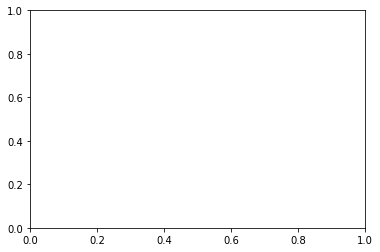

In [150]:

fig,ax = plt.subplots()


In [ ]:
from object_detection.utils import ops as utils_ops
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util